# Chapter 6 - Temporal-Difference Learning
This chapter introduces TD learning, which combines ideas from both Monte Carlo methods (Chapter 5) and Dynamic Programming (Chapter 4). Key aspects:

- Like MC, it learns from experience (samples of sequences of states, actions and rewards from interacting with an environment or a simulation), not from complete knowledge of the environment.

- Like DP, it updates its state- and action-values based partially on other learned estimates, that is it bootstraps.

### Exercise 6.1

Give an example in which TD update would be better on average than an MC update.

__Answer__: Following on the hint offered in the problem, if one already has good estimates of $V(s')$ for all $s' \in \mathcal{S'} \subset \mathcal{S}$, a subspace of $\mathcal{S}$, the TD update for any $s \notin \mathcal{S'}$ would be made immediately after the transition from $s$ to $s'$, like below:

$$
V^{TD}(s) \leftarrow V^{TD}(s) + \alpha \left[ r + \gamma V^{TD}(s') - V^{TD}(s) \right]
$$

On the other hand, the MC update would be made at the end of the episode, as below:

$$
V^{MC}(s) \leftarrow V^{MC}(s) + \alpha \left[ R(s) - V^{MC}(s) \right] = V^{MC}(s) + \alpha \left[ r + \gamma R(s') - V^{MC}(s) \right] \text {, where } R(\cdot) \text { denotes here a single return from a state.}
$$

And since we assumed that $V(s')$ is already very good, i.e. $V(s') \approx \mathbb{E} [R(s')]$, then we can see how the only difference in the update for $V(s)$ is between using a good approximation of expected returns from next state $s'$, i.e. $V(s')$ in the TD case versus using a single episode's return instead in the MC case, i.e. $R(s')$. We know that in the long term, after many episodes both converge to the expected value of returns, but in the TD case it does so more quickly as it only needs to learn the expected value of $r$ received by transitioning from $s$ to $s'$, not the entire returns from $s$.

The better estimate of $V^{TD}(s)$ also becomes available and propagates faster to other states that come ahead of $s$ in the episodes, thus reaching the expected values faster overall for all states, especially the ones that come before those in $\mathcal{S'}$.

Another way to see this situation is by looking at the two estimates as expectations:

$$
\begin{aligned}
    V^{MC}(s) &= \mathbb{E} \left[ R_t \mid s_t = s \right] \\
    V^{TD}(s) &= \mathbb{E} \left[ r_{t+1} + \gamma V^{TD} (s_{t+1}) \mid s_t = s \right] \\
\end{aligned}
$$

It is immediately obvious that for an unseen state $s$, the MC estimate will need a large number of (newly) sampled episodes (with their corresponding full returns) to converge to the expected value of $R_t$, while the TD estimate uses the fact that $R_t = r_{t+1} + \gamma r_{t+2} + \gamma^2 r_{t+3} + ... $ and that we might already have a good estimate for the return $R_{t'}$ from some later point $t' > t$, which is approximately $V(s_{t'})$. So TD could also be more sample efficient, as we'd only need to generate transitions from $s_t$ to $s_{t'}$ and use the (good) estimate $V(s_{t'})$ from there on.

### Exercise 6.2

From Figure 6.6 it appears that the first episode results in a change only in $V(A)$. What does this tell you about what happened on the first episode? Why was only the estimate for this one state changed? By exactly how much was it changed?

__Answer__: The first episode must have ended on the left terminal state, because the value of $V(A)$ was reduced from its original estimate of $0.5$ and the only positive reward is given by finishing on the right terminal. By the definition of any TD update, on this episode only the very last state before terminal has changed its value. For all other states their estimates remain unchanged:

$$
    V(s) \leftarrow V(s) + \alpha \left[ r + \gamma V(s') - V(s) \right] = 0.5 + 0.1 (0 + 1 \cdot 0.5 - 0.5) = 0.5
$$

For the last transition, from $A$ to the left terminal ($LT$), the update was:

$$
    V(A) = V(A) + \alpha \left[ r + \gamma V(LT) - V(A) \right] = 0.5 + 0.1 (0 + 1 \cdot 0 - 0.5) = 0.5 - 0.05 = 0.45.
$$

### Exercise 6.3

Do you think that by choosing the step-size parameter $\alpha$ differently, but still leaving it a constant, either algorithm could have done significantly better than shown in Figure 6.7? Why or why not?

__Answer__: In Section 6.2 it is mentioned that the constant-$\alpha$ update rule is proved to converge in the mean, for any small enough $\alpha$.
We can generalize the update rule for both TD and MC as:

$$
    V(s) \leftarrow V(s) + \alpha \left[ Target - V(s) \right] = (1 - \alpha) V(s) + \alpha \cdot Target
$$

So the new estimate for $V(s)$ could be considered a weighted average between the $Target$ and the old estimate, with weights $\alpha$ and $1-\alpha$, respectively, therefore $\alpha$ should be in $(0, 1)$. Additionally, an intuition would be that the weight for $Target$, i.e. $\alpha$ should be smaller than $1-\alpha$, since the value of $Target$ comes from a single state transition (for TD) or a single episode (for MC), hence can introduce high variance. So choosing a small $\alpha$ means the estimate is conservative, whereas a larger $\alpha$ leads to chasing the $Target$ faster, with potentially big jumps at least in the first few updates.

### Exercise 6.4

In Figure 6.7, the RMS error of the TD method seems to go down and then up again, particularly at high $\alpha$'s. What could have caused this? Do you think this always occurs or might it be a function of how the approximate value function was initialized?

__Answer__: This is a direct consequence of the TD update formula and the nature of the task. In this case, at every update, the $Target$ is either a $1$ (for a transition to the right terminal state) or a $0$ for all other transitions. Which means that we expect the outcome from each recent constant-$\alpha$ update to fluctuate continuously around the true values by some function of $\alpha * Target$. See a similar comment at Figure 6.6.

$$
    V(s) \leftarrow V(s) + \alpha \left[ Target - V(s) \right]
$$

So when $Target = 1$, the estimate grows by $\alpha \left[ Target - Estimate \right]$ and when $Target = 0$, the estimate decreases by $\alpha \cdot Estimate$. This fluctuation goes indefinitely, since $\alpha$ is kept constant.

See also Section 6.3 on _batch updating_ and more importantly on the difference between the batch updates for MC which tend to minimize the mean-squared error on the training set, while for TD it converges to the maximum-likelihood estimate of the underlying Markov model. Example 6.4 is useful in understanding this difference!

### Exercise 6.5

Describe at least two different ways of computing the true values for the random walk task, which are $\left\{ A: \frac{1}{6}, B: \frac{2}{6}, C: \frac{3}{6}, D: \frac{4}{6}, E: \frac{5}{6} \right\}$. Which would you guess we actually used? Why?

__Answer__: The first method would be to solve a system of linear equations which we construct in a recursive fashion (similar to DP and TD methods). Let's call the terminal states $TL$ and $TR$, while the value of reaching them is $0$ and $1$ respectively. Since the probability of choosing left or right in every state is $\frac{1}{2}$, then we have the following system of equations:

$$
\begin{aligned}
    V(E) &= \frac{1}{2} V(TR) + \frac{1}{2} V(D) = \frac{1}{2} + \frac{1}{2} V(D) \\
    V(D) &= \frac{1}{2} V(E) + \frac{1}{2} V(C) \\
    V(C) &= \frac{1}{2} V(D) + \frac{1}{2} V(B) \\
    V(B) &= \frac{1}{2} V(C) + \frac{1}{2} V(A) \\
    V(A) &= \frac{1}{2} V(B) + \frac{1}{2} V(TL) = \frac{1}{2} V(B) + \frac{1}{2} \\
\end{aligned}
$$

6 simple equations with 6 unknowns, etc. I assume this was the preferred method as it goes in the spirit of the book and was previously used in Example 3.11.

A second method could be to consider the symmetries of the environment, and first establish that for every episode starting from $A$ and ending in $TR$ for instance, there exists an exact mirrored episode starting from $E$ and takes the exact opposite moves, thus ending in $TL$. So this means that $V(A) = 1 - V(E)$ and $V(B) = 1 - V(D)$, while obviously $V(C) = \frac{1}{2}$ as also shown in the book...

### Exercise 6.6

Solve the Windy Gridworld task with king's moves, with and without a "zero" move, i.e. stay still. Solution with on-policy TD control algorithm (SARSA).

In [247]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
import random

%matplotlib inline

In [195]:
class State:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __eq__(self, other_state):
        return isinstance(other_state, self.__class__) and self.x == other_state.x and self.y == other_state.y

    def __hash__(self):
        return hash((self.__class__, self.x, self.y))

    def __str__(self):
        return f'({self.x}, {self.y})'


class Action:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __eq__(self, other_action):
        return isinstance(other_action, self.__class__) and self.x == other_action.x and self.y == other_action.y

    def __hash__(self):
        return hash((self.__class__, self.x, self.y))

    def __str__(self):
        return f'({self.x}, {self.y})'

    @property
    def is_standard_move(self):
        return self.x in [-1, 0, 1] and self.y in [-1, 0, 1] and self.x * self.y == 0 and self.x + self.y != 0

    @property
    def is_king_move(self):
        return self.x in [-1, 0, 1] and self.y in [-1, 0, 1] and (self.x != 0 or self.y != 0)

    @property
    def is_zero_move(self):
        return self.x == 0 and self.y == 0

In [196]:
class Policy:
    def __init__(self):
        self.pi = dict()

    def __call__(self, s: State, a: Action = None, explore=True):
        if s not in self.pi:
            return None
        if a is None:
            if explore:
                # Returns an action selected from the probability
                # distribution pi(s) over all legal actions in state s.
                return random.choices(list(self.pi[s].keys()), weights=list(self.pi[s].values()))[0] # list of one
            else:  # greedy action
                p_max = 0.
                a_max = None
                for a, p in self.pi[s].items():
                    if p > p_max:
                        p_max = p
                        a_max = a
                return a_max
        # otherwise return the probability of selecting action a in state s
        if a not in self.pi[s]:
            return None
        return self.pi[s][a]

    def seen(self, s):
        return s in self.pi

    def update(self, s, a, p):
        if s not in self.pi:
            self.pi[s] = dict()
        self.pi[s][a] = p


class Gridworld:
    def __init__(self, nrows, ncols, wind, start, goal, king_moves=False, zero_moves=False, stochastic_wind=False):
        assert len(wind) == ncols, 'wind length <> ncols'
        self.nrows = nrows
        self.ncols = ncols
        self.wind = wind
        self.stochastic_wind = stochastic_wind
        self.king_moves = king_moves
        self.zero_moves = zero_moves
        self.state = start
        self.goal = goal
    
    @property
    def is_terminal(self):
        return self.state == self.goal

    def legal_moves(self, s: State = None):
        if s is None:
            s = self.state
        if s == self.goal:
            return []
        A_s = []
        for ax in [-1, 0, 1]:
            for ay in [-1, 0, 1]:
                a = Action(ax, ay)
                if self.zero_moves and a.is_zero_move:
                    A_s.append(a)
                    continue
                if self.king_moves and a.is_king_move:
                    A_s.append(a)
                elif a.is_standard_move:
                    A_s.append(a)
        return A_s

    def step(self, a: Action):
        if self.king_moves:
            if self.zero_moves:
                assert a.is_king_move or a.is_zero_move, 'illegal move'
            else:
                assert a.is_king_move, 'illegal move'
        else:
            if self.zero_moves:
                assert a.is_standard_move or a.is_zero_move, 'illegal move'
            else:
                assert a.is_standard_move, 'illegal move'
        if self.stochastic_wind:
            wind = self.wind[self.state.y] + random.choice([-1, 0, 1])
        else:
            wind = self.wind[self.state.y]
        # move to the next state
        new_x = max(min(self.state.x + a.x + wind, self.nrows - 1), 0)
        new_y = max(min(self.state.y + a.y, self.ncols - 1), 0)
        self.state = State(new_x, new_y)
        return (self.state, -1)

In [197]:
class StateActionValue:
    def __init__(self):
        self.Q = dict()

    # the value(s) of state s and selecting action a (or all)
    def __call__(self, s: State, a: Action = None):
        if s not in self.Q:
            return None
        if a is None:
            # value of all actions from s
            return self.Q[s]
        if a not in self.Q[s]:
            return None
        return self.Q[s][a]

    def update(self, s, a, q):
        if s not in self.Q:
            self.Q[s] = dict()
        self.Q[s][a] = q

In [292]:
class OnPolicyTDAgent:
    def __init__(self, gamma=1.):
        self.gamma = gamma
        self.pi = Policy()
        self.Q = StateActionValue()

    def add_state_to_policy(self, env, s):
        if not self.pi.seen(s):
            # state has not been seen before,
            # add whole action space to policy
            # with uniform probability
            # also add them to action values
            A_s = env.legal_moves(s)
            for a in A_s:
                self.pi.update(s, a, 1. / len(A_s))
                self.Q.update(s, a, 0.)  # optimistic

    """ Generate a single episode for a given environment
        starting from whatever state the environment is in.
        It goes until terminal state or max_steps was reached.
    """
    def play_episode(
            self,
            env: Gridworld,
            max_steps=1000,  # avoid getting stuck especially when explore=False
            train=False,  # whether it updates its policy and Q-values during the episode
            explore=True,  # whether to behave greedy or epsilon-greedy
            epsilon=0.1,  # epsilon for epsilon-greedy policy updates
            alpha=0.1,  # step size for each update of Q-values
            keep_trace=False,  # store a list of tuples for all transitions
        ):
        R = 0.
        trace = []
        t = 0  # time steps
        s = env.state
        while not env.is_terminal and t < max_steps:
            self.add_state_to_policy(env, s)
            a = self.pi(s, explore=explore)  # select action according to policy
            next_s, r = env.step(a)
            if next_s != env.goal:
                self.add_state_to_policy(env, next_s)
            R = r + self.gamma * R
            if keep_trace:
                trace.append((s, a, r, next_s))

            # on-policy TD update
            if train:
                if next_s != env.goal:
                    next_a = self.pi(next_s, explore=explore)  # next action
                    # update action values and policy
                    new_q = self.Q(s, a) + alpha * (r + self.gamma * self.Q(next_s, next_a) - self.Q(s, a))
                else:
                    new_q = self.Q(s, a) + alpha * (r - self.Q(s, a))  # value of terminal state = 0 in this game
                self.Q.update(s, a, new_q)
                # epsilon-greedy updates
                q_max = -999999.
                a_max = None
                n = len(self.Q(s))
                for a, q in self.Q(s).items():
                    if q > q_max:
                        q_max = q
                        a_max = a
                    self.pi.update(s, a, epsilon / n)
                self.pi.update(s, a_max, 1. - epsilon + epsilon / n)

            s = next_s
            t += 1
        return R, trace

    def train_controller(self, episodes=100, stochastic_wind=False, king_moves=False, zero_moves=False):
        epsilon = 0.1
        alpha = 0.1
        R_list = []
        for e in range(episodes):
            env = Gridworld(
                nrows=7,
                ncols=10,
                wind=[0, 0, 0, 1, 1, 1, 2, 2, 1, 0],
                start=State(3, 0),
                goal=State(3, 7),
                stochastic_wind=stochastic_wind,
                king_moves=king_moves,
                zero_moves=zero_moves,
            )
            R, _ = self.play_episode(env=env, train=True, explore=True, epsilon=epsilon, alpha=alpha, keep_trace=False)
            R_list.append(R)
        return R_list


# plot all moves on a given env
def plot_trace(env: Gridworld, trace):
    fig, ax = plt.subplots(figsize=(5, 5))
    x = np.zeros((env.nrows, env.ncols))
    path_x = []
    path_y = []
    for t in trace:
        x[t[0].x, t[0].y] = 1
        path_x.append(t[0].x + 0.5)
        path_y.append(t[0].y + 0.5)
        # plot the intended action, usually differs from the actual direction if there's wind
        ax.arrow(
            x=t[0].y + 0.5, y=t[0].x + 0.5, dx=t[1].y, dy=t[1].x, head_width=0.2,
            width=0.02, length_includes_head=True, color='yellow', zorder=2)
    x[t[3].x, t[3].y] = 1
    path_x.append(t[3].x + 0.5)
    path_y.append(t[3].y + 0.5)
    ax.pcolormesh(x, edgecolors='black', linewidth=1.5, alpha = 0.5, cmap='coolwarm')
    ax.plot(path_y, path_x, color='red', linewidth=7, alpha=0.5, zorder=1)
    ax.set_aspect('equal')
    plt.show()

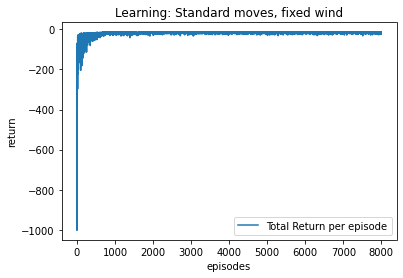

In [307]:
# only standard moves, fixed wind, i.e. reproduce Figure 6.11
agent = OnPolicyTDAgent()
R_list = agent.train_controller(episodes=8000, stochastic_wind=False, king_moves=False, zero_moves=False)
plt.plot(R_list, label='Total Return per episode')
plt.xlabel('episodes')
plt.ylabel('return')
plt.title('Learning: Standard moves, fixed wind')
plt.legend()
plt.show()

Total Return: -15.0


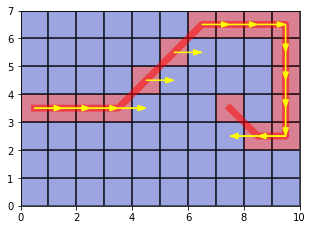

In [306]:
env = Gridworld(
    nrows=7,
    ncols=10,
    wind=[0, 0, 0, 1, 1, 1, 2, 2, 1, 0],
    start=State(3, 0),
    goal=State(3, 7),
    stochastic_wind=False,
    king_moves=False,
    zero_moves=False,
)
R, trace = agent.play_episode(env, keep_trace=True, explore=False, max_steps=1000)
print(f'Total Return: {R}')
plot_trace(env, trace)

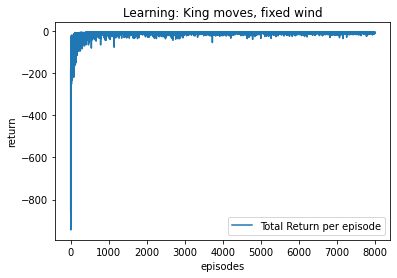

In [308]:
# king moves, fixed wind, i.e. Exercise 6.6
agent = OnPolicyTDAgent()
R_list = agent.train_controller(episodes=8000, stochastic_wind=False, king_moves=True, zero_moves=False)
plt.plot(R_list, label='Total Return per episode')
plt.xlabel('episodes')
plt.ylabel('return')
plt.title('Learning: King moves, fixed wind')
plt.legend()
plt.show()

Total Return: -7.0


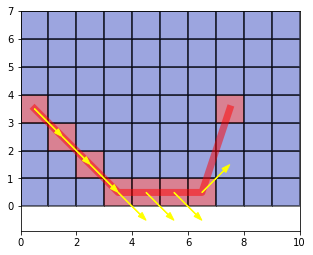

In [310]:
env = Gridworld(
    nrows=7,
    ncols=10,
    wind=[0, 0, 0, 1, 1, 1, 2, 2, 1, 0],
    start=State(3, 0),
    goal=State(3, 7),
    stochastic_wind=False,
    king_moves=True,
    zero_moves=False,
)
R, trace = agent.play_episode(env, keep_trace=True, explore=False, max_steps=1000)
print(f'Total Return: {R}')
plot_trace(env, trace)

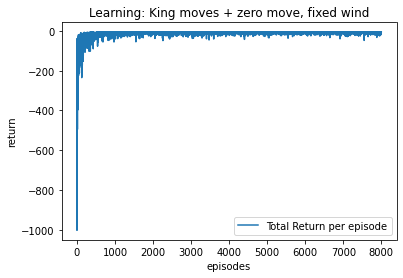

In [311]:
# king moves plus the zero move, fixed wind, i.e. Exercise 6.6, second part
agent = OnPolicyTDAgent()
R_list = agent.train_controller(episodes=8000, stochastic_wind=False, king_moves=True, zero_moves=True)
plt.plot(R_list, label='Total Return per episode')
plt.xlabel('episodes')
plt.ylabel('return')
plt.title('Learning: King moves + zero move, fixed wind')
plt.legend()
plt.show()

Total Return: -7.0


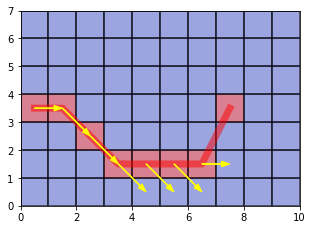

In [313]:
env = Gridworld(
    nrows=7,
    ncols=10,
    wind=[0, 0, 0, 1, 1, 1, 2, 2, 1, 0],
    start=State(3, 0),
    goal=State(3, 7),
    stochastic_wind=False,
    king_moves=True,
    zero_moves=True,
)
R, trace = agent.play_episode(env, keep_trace=True, explore=False, max_steps=1000)
print(f'Total Return: {R}')
plot_trace(env, trace)

### Exercise 6.7

Solve the same problem with stochastic wind. 
Notice that this problem is much harder to learn, and there is high variance between total returns due to the randomness of the wind strength.

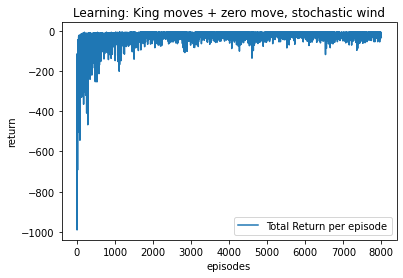

In [314]:
# king moves plus the zero move, stochastic wind, i.e. Exercise 6.7
agent = OnPolicyTDAgent()
R_list = agent.train_controller(episodes=8000, stochastic_wind=True, king_moves=True, zero_moves=True)
plt.plot(R_list, label='Total Return per episode')
plt.xlabel('episodes')
plt.ylabel('return')
plt.title('Learning: King moves + zero move, stochastic wind')
plt.legend()
plt.show()

Total Return: -12.0


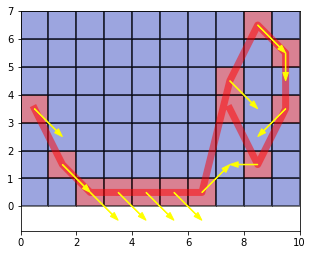

In [320]:
env = Gridworld(
    nrows=7,
    ncols=10,
    wind=[0, 0, 0, 1, 1, 1, 2, 2, 1, 0],
    start=State(3, 0),
    goal=State(3, 7),
    stochastic_wind=True,
    king_moves=True,
    zero_moves=True,
)
R, trace = agent.play_episode(env, keep_trace=True, explore=False, max_steps=1000)
print(f'Total Return: {R}')
plot_trace(env, trace)

Total Return: -30.0


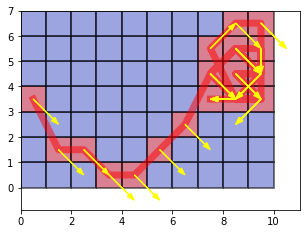

In [324]:
# another episode, completely different 
# return from the same policy
env = Gridworld(
    nrows=7,
    ncols=10,
    wind=[0, 0, 0, 1, 1, 1, 2, 2, 1, 0],
    start=State(3, 0),
    goal=State(3, 7),
    stochastic_wind=True,
    king_moves=True,
    zero_moves=True,
)
R, trace = agent.play_episode(env, keep_trace=True, explore=False, max_steps=1000)
print(f'Total Return: {R}')
plot_trace(env, trace)

### Exercise 6.8

What is the backup diagram for Sarsa?

$$
\begin{aligned}
    & \bullet \text{---------} \bigcirc \text{---------} \bullet \\
    & (s, a) \qquad s' \qquad (s', a') \\
\end{aligned}
$$